# Lecture 4: Deep learning

## 4.1. Deep learning - main elements

### 4.1.1. Concept

What is it?
- methodology in which we can train machine complex representations
- addresses the problem of learning hierarchical representations with a single (a few) algorithm(s)
- models with a feature hierarchy (lower-level features are learned at one layer of a model, and then those features are combined at the next level). 
- it's deep if it has more than one stage of non-linear feature transformation
- hierarchy of representations with increasing level of abstraction 
    * Image recognition 
        - Pixel → edge → texton → motif → part → object 
    * Text 
        - Character → word → word group → clause → sentence → story 
    * Speech 
        - Sample → spectral band → sound → … → phone → phoneme → word

Deep networks/architectures
- Convolutional NNs
- Auto-encoders
- Deep Belief Nets (Restricted Boltzmann machines)
- Recurrent Neural Networks 
- Generative Adversial Networks


Main characteristics:
- Collection of methods to improve the optimisation and generalisation of learning methods, especially NNs:
    * Rectified linear units
    * Dropout
    * Batch normalisation
    * Weight decay regularisation
    * Momentum learning

- Stacking layers of transformations to create successively more abstract levels of representation
    * Depth over breadth
    * Deep MLPs

- Shared parameters
    * Convolutional NNs
    * Recurrent NNs

- Technological improvements
    * Massively parallel processing: GPUs, CUDA
    * Fast libraries: Torch, cuDNN, CUDA-convNet, Theano




### 4.1.2. An ML algorithm as an optimisation approach 

An optimization problem     
- minimize the loss function 
- with respect to the parameters of the score function.

Remark:
- score function  
    * maps the raw data to class scores/labels
- loss function 
    * quantifies the agreement between the predicted scores and the ground truth scores/labels
    * ANN: quantifies the quality of any particular set of weights W
    * two components
        - the data loss computes the compatibility between the computed scores and the true labels. 
        - the regularization loss is only a function of the weights

Suppose a supervised classification problem
- Some input data (examples, instances, cases)
    * Training data – as pairs (attributeData_i, label_i), where:
        - i = 1, N (N = \# of training data)
        - $attributeData_i= (atri_1, atri_2, ..., atri_m)$, m – \# attributes (characteristics, features) for an input data
        - $label_i ϵ \{Label_1, Label_2, …, Label_{\#classes}\}$
    * Test data – as ($attributeData_i$), i = 1, n (n = \# of testing data).
- Determine
    * an unknown function that maps inputs (features) into outputs (labels)
    * output (label / class / value / score) associated to a new data by using the learnt function

Quality of learning
- Accuracy / Precision / Recall / etc
    * does not reflect the learnt decision model
- A loss function 
    * Expresses (encodes) the learnt model 
    * Difference between desired (D) and computed (C) output
    * L2 norm - Quadratic cost (mean squared error) 
    > $ \sum{|| D – C||^2}$  
    * L1 norm 
    > $ \sum{| D – C|} $
    * SVM loss (hinge loss, max-margin loss) 
    > $ \sum_{i}{\sum_{j, j ≠ y_i}{max(C_j – D_{y_i} + \Delta, 0)}}$
    * Softmax loss 
    > $ \sum_{i}{\frac{- ln(exp(D_{y_i}))}{\sum_{j, j ≠ y_i}{exp(C_j)}}}$
    * Cross-entropy 
    > $-\sum{\frac{D ln C + ( 1 – D) ln(1 - C)}{n}}$ 

Several important mappings
- Constant f(x) = c
- Step f(x) = a, if x < theta, and b, otherwise  
- Linear f(x) = a x + b
- Sigmoid σ(x) = 1 / (1 + e^{−x}) (avoid it in a Conv NN)
- Hyperbolic tangent function tanh(x) = 2 σ(2x) − 1
- Rectified linear neuron/unit (ReLU) f(x) = max(0, x)
- Leak ReLU (Parametric rectifier) f(x) = max(α x, x)
- Maxout max(w^T_1x + b_1,w^T_2x + b_2)
- Exponential linear units (ELU)  f(x) = x, if x > 0 and α (exp(x) – 1), if x ≤ 0


A linear classifier

> $f(x, w) = w · x + b$

  >> $w \in R^{\#classes \times \#features}$ 

  >> $x \in R^{\#features \times 1}$

  >> $b \in R^{\#classes}$

A non linear classifier 

> $f(x, w) = w_2 max(0, w_1 · x + b_1) + b_2$,
    
  >> $w_1 \in R^{PARAM \times \#features}$ 
  
  >> $x \in R^{\#features \times 1}$
  
  >> $b_1 \in R^{PARAM}$
  
  >> $w_2 \in R^{\#classes \times PARAM}$
  
  >> $b_2 \in R^{\#classes}$






**Classical ANN**

Architectures – special graphs with nodes placed on layers 
- Layers 
    * Input layer – size = input’s size (#features)
    * Hidden layers – various sizes (#layers, # neurons/layer)
    * Output layers – size = output size (e.g. # classes)
- Topology
    * Full connected layers (one-way connections, recurrent connections)

Mechanism
- Neuron activation
    * Constant, step, linear, sigmoid
- Cost & Loss function -> smooth cost function (depends on w & b)
    * Difference between desired (D) and computed © output
    * Quadratic cost (mean squared error)
    > $\frac{\sum{|| D – C||^2}}{2n}$
    * Cross-entropy
    >  $-\sum{\frac{D ln C + ( 1 – D) ln(1 - C)}{n}}$ 

Learning algorithm 
- Perceptron rule
- Delta rule (Simple/Stochastic Gradient Descent)







**Convolutional NNs**

Main characteristics:
- More layers
- More nodes/layer

Topology of connections
- Regular NNs -> fully connected <img style="vertical-align:middle" src="images\ann.png" alt="networks" width="400"/>
    * O(\#inputs x \#outputs)
- Conv NNs -> partially connected  <img style="vertical-align:middle" src="images\cnn1.png" alt="networks" width="400"/>
    * connect each neuron to only a local region of the input volume
    * O(\#someInputs x \#outputs)




Topology of layers
- Regular NNs -> linear layers
- Conv NNs -> 2D/3D layers (width, height, depth) <img style="vertical-align:middle" src="images/cnn.png" alt="conv networks"/>

**Convolutional layer**

Aim 
- learn data-specific kernels
- perform a liniar  (see this [material](https://arxiv.org/pdf/1603.07285v1.pdf) for math explanations)

Filters or Local receptive fields or Kernels
- Content
    * convolution (signal theory) vs. Cross-correlation 
    * a little (square/cube) window on the input pixels
- How it works?
    * slide the local receptive field across the entire input image
- Size
    * size of field / filter (F)
    * Stride (S)
- Learning process
    * each hidden neuron has 
        - FxF shared weights connected to its local receptive field
        - a shared bias
        - an activation function
    * each connection learns a weight
    * the hidden neuron learns an overall bias as well
    * all the neurons in the first hidden layer detect exactly the same feature (just at different locations in the input image) -> map from input to the first hidden layer = feature map / activation map

How does it work?

- Take an input I (example, instance, data) of various dimensions 
    * a signal -> 1D input (I_{length})
    * a grayscale image -> 2D input (I_{Width} & I_{Height})
    * an RGB image -> 3D input (I_{Width}, I_{Height} & I_{Depth} = 3) 
- Consider a set of filters (kernels) F_1, F_2, ..., F_{#filters}
    * A filter must have the same \# dimensions as the input
        - A signal -> 1D filter 
        > F_{length} << I_{length}
        - a grayscale image -> 2D filter 
        > F_{width} << I_{width} & F_{height} << I_{height}
        - an RGB image -> 3D filter
        > F_{width} << I_{width} & F_{height} << I_{height} &  F_{depth} = I_{Depth} = 3
- Apply each filter over the input
    * Overlap filter over a window of the input
        - Stride
        - Padding 
    * Multiply the filter and the window
    * Store the results in an activation map
        - \# activation maps = # filters
- Activate all the elements of each activation map
    * ReLU or other activation function

<img src="images/filter1.png" alt="filters" width="400"/>

     
<img src="images/filter2.png" alt="filters" width="400"/>


<img src="images/filter3.png" alt="filters" width="400"/>





**Hyperparameters**

- input volume size N (L or WI & HI or WI & HI & DI)
- size of zero-padding of input volume P (PL or PW & PH or PW & PH & PD)
- the receptive field size (filter size) F (FL, FW & FH, FW & FH & FD) 
- stride of the convolutional layer S (SL, SW & SH, SW & SH & SD)
- \# of filters (K)
- depth of the output volume 

\# neurons of an activation map =  (N + 2P − F)/S+1

Output size (O or WO & HO or WO & HO & DO)
- K * [(N + 2P − F)/S+1]

N = L = 5, P = 1, 
- F = 3, S = 1
- F = 3, S = 2

<img src="images/hyperparam.png" alt="hyperparameters" width="400"/>

<img src="images/convComputing.png" alt="convolution" width="400"/>

<img src="images/sliding.png" alt="sliding" width="400"/>


**Convolutional layer** – typology 

- Classic convolution <img style="vertical-align:middle" src="images/sliding.png" alt="sliding" width="400"/>
    
    * one filter, D channels <img  style="vertical-align:middle" src="images/oneFilter.png" alt="convolution" width="600"/>

    * more filters (K), D channels <img  style="vertical-align:middle" src="images/moreFilters.png" alt="convolution" width="600"/>

- Transposed convolution (deconvolution) <img style="vertical-align:middle" src="images/transposedConv.gif" alt="convolution" width="200"/>

    * See [article](https://arxiv.org/pdf/1603.07285.pdf)
    
    
    
    * utility
        - Up-sampling - How? 

            > $ ImgLarge * F = ImgSmall$

            > $ ImgLarge * F * F^T = ImgSmall* F^T $

            > $ ImgLarge * I = ImgSmall * F^T $

            > $ ImgLarge = ImgSmall * F^T $

            - image generation - in GANs (Generative Adversial Networks (future lecture)
        
        - semantic segmentation -> Autoencoders (future lecture)

    * more details [link](https://distill.pub/2016/deconv-checkerboard/)

    

- Dilated convolution (atrous convolution)  <img style="vertical-align:middle"  src="images/dilatedConv.gif" alt="convolution" width="400"/>

    * see [link](https://arxiv.org/pdf/1511.07122.pdf)

   

    * utility
        - working with higher resolution images, but fine-grained details are still important
        - constructing a network with fewer parameters
        - broader view of the input to capture more contextual information


In [ ]:
!pip install tensorflow

(8, 8, 1)


C:\Users\laura\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\laura\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\up_sampling2d.py:72: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\laura\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv_transpose.py:94: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  supe

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
(32, 32, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


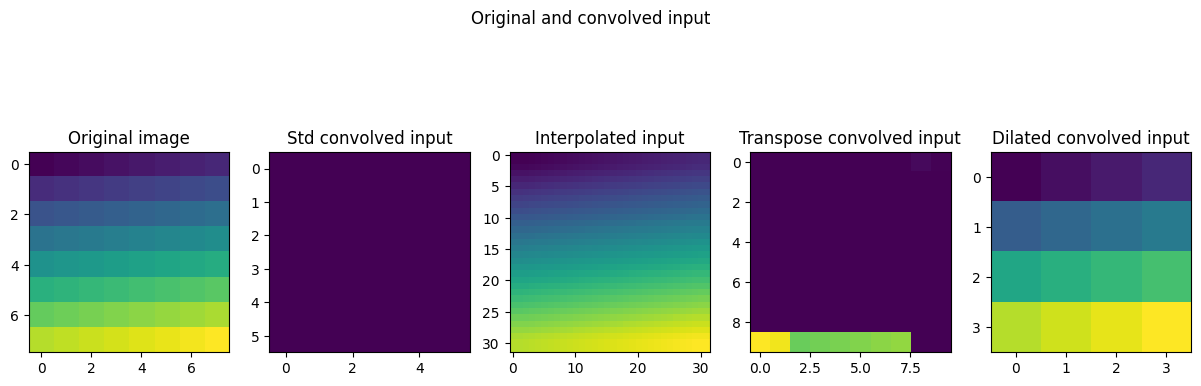

In [5]:
# different convolutions

import keras
from keras.models import Sequential
from keras.layers import UpSampling2D, Conv2DTranspose, Conv2D
import matplotlib.pyplot as plt
import numpy as np

# Generate some data
img_size = 8
input_flattened = np.arange(0, img_size * img_size / 2, 0.5)
input_image = np.reshape(input_flattened, (img_size, img_size, 1))
input_image_shape = np.shape(input_image)
print(input_image_shape)
input_image_shape = (input_image_shape[0], input_image_shape[1], 1)

# apply different conv
# std conv
model1 = Sequential()
model1.add(Conv2D(12, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=input_image_shape))

# interpolation
model2 = Sequential()
model2.add(UpSampling2D((4, 4), input_shape=input_image_shape, interpolation='bilinear'))

# transposed cond
model3 = Sequential()
model3.add(Conv2DTranspose(32, kernel_size=(3,3), input_shape=input_image_shape, activation='relu', kernel_initializer='he_normal'))

# dilated conv
model4 = Sequential()
model4.add(Conv2D(12, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=input_image_shape, dilation_rate=(2,2)))


# Perform conv and obtain the output
input = np.array([input_image])
output1 = model1.predict(input)[0]
output2 = model2.predict(input)[0]
print(output2.shape)
output3 = model3.predict(input)[0]
output4 = model4.predict(input)[0]

# Visualize input and output
fig, axes = plt.subplots(1, 5, figsize=(15,5))
axes[0].imshow(input_image[:, :, 0]) 
axes[0].set_title('Original image')
axes[1].imshow(output1[:, :, 0])
axes[1].set_title('Std convolved input')
axes[2].imshow(output2[:, :, 0])
axes[2].set_title('Interpolated input')
axes[3].imshow(output3[:, :, 0])
axes[3].set_title('Transpose convolved input')
axes[4].imshow(output4[:, :, 0])
axes[4].set_title('Dilated convolved input')

fig.suptitle(f'Original and convolved input')
plt.show()

another example - an encoder-decoder


Epoch 1/3
48/48 [==============================] - 174s 4s/step - loss: 0.2971 - val_loss: 0.0907
Epoch 2/3
48/48 [==============================] - 173s 4s/step - loss: 0.0789 - val_loss: 0.0744
Epoch 3/3
48/48 [==============================] - 173s 4s/step - loss: 0.0697 - val_loss: 0.0681


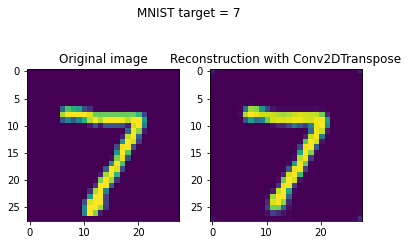

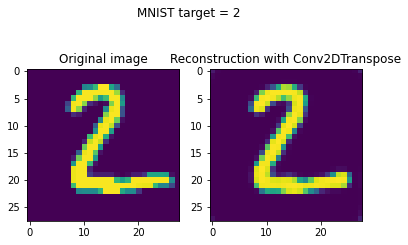

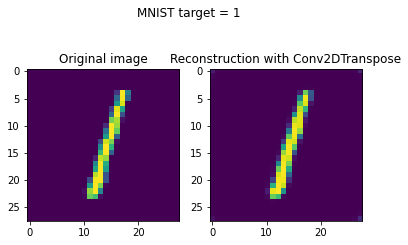

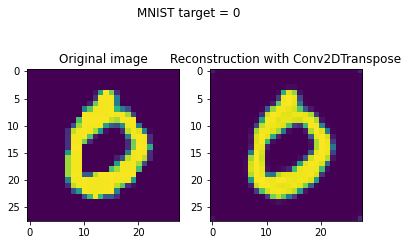

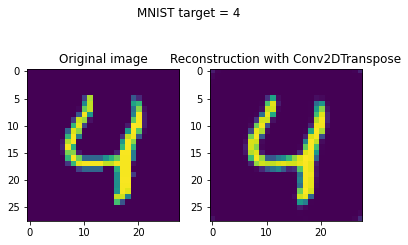

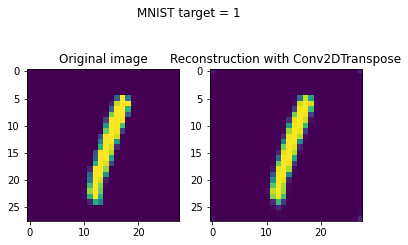

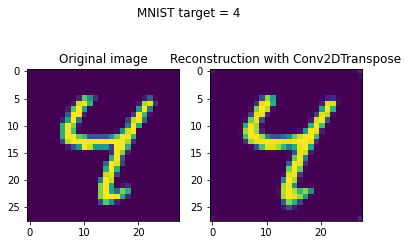

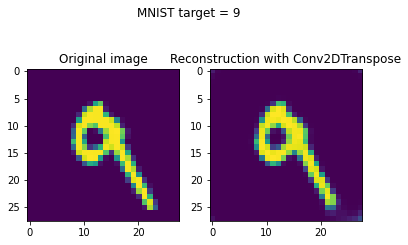

In [4]:
# encoder-decoder example that uses convolution and deconvolution
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, Conv2DTranspose
import matplotlib.pyplot as plt
import numpy as np

# Model configuration
img_width, img_height = 28, 28
batch_size = 1000
no_epochs = 3
no_classes = 10
validation_split = 0.2
verbosity = 1

# Load MNIST dataset
(input_train, target_train), (input_test, target_test) = mnist.load_data()

# Reshape data
input_train = input_train.reshape(input_train.shape[0], img_width, img_height, 1)
input_test = input_test.reshape(input_test.shape[0], img_width, img_height, 1)
input_shape = (img_width, img_height, 1)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=input_shape))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2DTranspose(8, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2DTranspose(16, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2DTranspose(32, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same'))

# Compile and fit data
model.compile(optimizer='adam', loss='binary_crossentropy')

model.fit(input_train, input_train,
                epochs=no_epochs,
                batch_size=batch_size,
                validation_split=validation_split)

# Generate reconstructions
num_reconstructions = 8
samples = input_test[:num_reconstructions]
targets = target_test[:num_reconstructions]
reconstructions = model.predict(samples)

# Plot reconstructions
for i in np.arange(0, num_reconstructions):
  # Get the sample and the reconstruction
  sample = samples[i][:, :, 0]
  reconstruction = reconstructions[i][:, :, 0]
  input_class = targets[i]
  # Matplotlib preparations
  fig, axes = plt.subplots(1, 2)
  # Plot sample and reconstruciton
  axes[0].imshow(sample)
  axes[0].set_title('Original image')
  axes[1].imshow(reconstruction)
  axes[1].set_title('Reconstruction with Conv2DTranspose')
  fig.suptitle(f'MNIST target = {input_class}')
  plt.show()



- Spatial separable (depth-wise separable) convolution
    
    * Split the convolution into
        
        - A depthwise convolution <img style="vertical-align:middle" src="images/depthWiseConv.png" alt="convolution" width="400"/>

        - A pointwise convolution 

            - <img style="vertical-align:middle" src="images/pointWiseConv1.png" alt="convolution" width="400"/>

            - <img style="vertical-align:middle"  src="images/pointWiseConv2.png" alt="convolution" width="400"/>   

    * E.g. Sobel operator <img style="vertical-align:middle"  src="images/stdVsDepthwiseConv.png" alt="convolution" width="900"/>   

    * standard versus spatial separable 

| standard (classic) | | spatial separable |
| :--- | :---: |:--- |
| Image: $W_I \times H_I \times D_I = 12 \times 12 \times 3$ | | Image: $W_I \times H_I \times D_I = 12 \times 12 \times 3$ |
| 1 filter: $F_w \times F_H \times F_D = 5 \times 5 \times 3$ | | 3 filters: $F_w \times F_H \times F_D = 5 \times 5 \times 1$ |
| | | 1 filter $F'_W \times F'_H \times F'_D = 1 \times 1 \times 3$ | | 
| No padding: P = 0 | | No padding: P = 0 | 
| Stride 1: S = 1 | | Stride 1: S = 1 |
| Output: $W_O \times H_o \times D_O = 8 \times 8 \times 1$ | | Output: $W_O \times H_O \times D_O = 8 \times 8 \times 256$ |
| 1 * (5 * 5 * 3) * (8 * 8) = 4 800 | | 3 * (5 * 5) * (8 * 8) = 4 800 |
| | | 1 * (1 * 1 * 3) * (8 * 8) = 192 |
| => 4 800 ops. | | => 4 992 ops |
|--------------------------------|---|--------------------------------|
| Image: $W_I \times H_I \times D_I = 12 \times 12 \times 3$ | | Image: $W_I \times H_I \times D_I = 12 \times 12 \times 3$ |
| 256 filters: $F_w \times F_H \times F_D = 5 \times 5 \times 3$ | | 3 filters: $F_w \times F_H \times F_D = 5 \times 5 \times 1$ |
| | | 256 filters $F'_W \times F'_H \times F'_D = 1 \times 1 \times 3$ | 
| No padding: P = 0 | | No padding: P = 0 | 
| Stride 1: S = 1 | | Stride 1: S = 1 |
| Output: $W_O \times H_o \times D_O = 8 \times 8 \times 256$ | | Output: $W_O \times H_O \times D_O = 8 \times 8 \times 256$ |
| 256 * (5 * 5 * 3) * (8 * 8) =  1 228 800 | | 3 * (5 * 5) * (8 * 8) = 4800 |
| | | 256 * (1 * 1 * 3) * (8 * 8) = 49 152 |
| => 1 228 800 ops. | | => 53 952 ops |


- Grouped convolutions
    
    * See [article](https://arxiv.org/pdf/1605.06489.pdf)
    
    * Efficient training (More GPUs) => model parallelisation
    
    * Fewer parameters 
    
    * Better representations <img style="vertical-align:middle" src="images/groupConv1.png" alt="convolution" width="400"/> <img style="vertical-align:middle" src="images/groupConv2.png" alt="convolution" width="400"/>
    * see laso these materials [link](https://blog.yani.ai/filter-group-tutorial/) [link](https://arxiv.org/abs/1707.09855) 

| standard (classic) convolution | | grouped convolution|
| :--- | :---: |:--- |
| Image: $W_I \times H_I \times D_I = 12 \times 12 \times D_I$ | | Image: $W_I \times H_I \times D_I = 12 \times 12 \times D_I $ |
| $D_O$ filters: $F_w \times F_H \times D_I = 5 \times 5 \times D_I $ | | $\frac{D_O}{2}$  filters: $F_w \times F_H \times \frac{D_I}{2} = 5 \times 5 \times \frac{D_I}{2}$ |
| | | $\frac{D_O}{2}$ filters $F'_W \times F'_H \times \frac{D_I}{2} = 5 \times 5 \times \frac{D_I}{2}$ | 
| No padding: P = 0 | | No padding: P = 0 | 
| Stride 1: S = 1 | | Stride 1: S = 1 |
| Output: $W_O \times H_o \times D_O = 8 \times 8 \times D_O$ | | Output: $W_O \times H_O \times D_O = 8 \times 8 \times D_O$ |
| #operations: $F_W \times F_H \times D_I \times D_O = 5 \times 5 \times D_I \times D_O$ | | #operations: $[F_W \times F_H \times \frac{D_I}{2} \times \frac{D_O}{2}\ \times 2 = 5 \times 5 \times D_I \times \frac{D_O}{2} $|


In [2]:
# standard convolution vs. depthwise separable convolutions
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, SeparableConv2D
from keras import backend as K

# Model configuration
img_width, img_height = 28, 28
batch_size = 50
no_epochs = 10
no_classes = 10
validation_split = 0.2
verbosity = 1

# Load MNIST dataset
(input_train, target_train), (input_test, target_test) = mnist.load_data()

# Source: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
if K.image_data_format() == 'channels_first':
    input_train = input_train.reshape(input_train.shape[0], 1, img_width, img_height)
    input_test = input_test.reshape(input_test.shape[0], 1, img_width, img_height)
    input_shape = (1, img_width, img_height)
else:
    input_train = input_train.reshape(input_train.shape[0], img_width, img_height, 1)
    input_test = input_test.reshape(input_test.shape[0], img_width, img_height, 1)
    input_shape = (img_width, img_height, 1)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Convert them into black or white: [0, 1].
input_train = input_train / 255
input_test = input_test / 255

# Convert target vectors to categorical targets
target_train = keras.utils.to_categorical(target_train, no_classes)
target_test = keras.utils.to_categorical(target_test, no_classes)


In [4]:
# Create the model woth standard convolutions
model1 = Sequential()
# standard conv
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
# standard conv
model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dense(no_classes, activation='softmax'))

# Compile the model
model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# Fit data to model
model1.fit(input_train, target_train,
          batch_size=batch_size,
          epochs=no_epochs,
          verbose=verbosity,
          validation_split=validation_split)

# Generate generalization metrics
score = model1.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

C:\Users\laura\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 49s 46ms/step - accuracy: 0.8702 - loss: 0.4156 - val_accuracy: 0.9837 - val_loss: 0.0544
Epoch 2/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.9793 - loss: 0.0672 - val_accuracy: 0.9886 - val_loss: 0.0426
Epoch 3/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 44s 46ms/step - accuracy: 0.9863 - loss: 0.0468 - val_accuracy: 0.9878 - val_loss: 0.0405
Epoch 4/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 44s 45ms/step - accuracy: 0.9883 - loss: 0.0368 - val_accuracy: 0.9905 - val_loss: 0.0329
Epoch 5/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 108s 72ms/step - accuracy: 0.9906 - loss: 0.0287 - val_accuracy: 0.9878 - val_loss: 0.0416
Epoch 6/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 53s 55ms/step - accuracy: 0.9920 - loss: 0.0235 - val_accuracy: 0.9858 - val_loss: 0.0464
Epoch 7/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 35s 36ms/step - accuracy: 0.9935 - loss: 0.0193 - val_accuracy: 0.9917 - val_loss: 0.0292
Epoch 8/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 37s 38ms/step - accuracy: 0.9941 - loss: 0.0176 -

In [3]:
# Create the modelwith separable convolutions
model2 = Sequential()
# depthwise separable conv -> check the training time for an epoch
model2.add(SeparableConv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
# depthwse separable conv
model2.add(SeparableConv2D(64, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dense(no_classes, activation='softmax'))

# Compile the model
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# Fit data to model
model2.fit(input_train, target_train,
          batch_size=batch_size,
          epochs=no_epochs,
          verbose=verbosity,
          validation_split=validation_split)

# Generate generalization metrics
score = model2.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

C:\Users\laura\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_separable_conv.py:104: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 31s 29ms/step - accuracy: 0.8103 - loss: 0.6366 - val_accuracy: 0.9652 - val_loss: 0.1110
Epoch 2/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 30s 31ms/step - accuracy: 0.9625 - loss: 0.1195 - val_accuracy: 0.9721 - val_loss: 0.0888
Epoch 3/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9711 - loss: 0.0896 - val_accuracy: 0.9811 - val_loss: 0.0596
Epoch 4/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 45s 47ms/step - accuracy: 0.9762 - loss: 0.0736 - val_accuracy: 0.9835 - val_loss: 0.0513
Epoch 5/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 72s 37ms/step - accuracy: 0.9813 - loss: 0.0570 - val_accuracy: 0.9852 - val_loss: 0.0498
Epoch 6/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 43s 45ms/step - accuracy: 0.9844 - loss: 0.0465 - val_accuracy: 0.9846 - val_loss: 0.0509
Epoch 7/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.9866 - loss: 0.0431 - val_accuracy: 0.9866 - val_loss: 0.0441
Epoch 8/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 48s 50ms/step - accuracy: 0.9877 - loss: 0.0366 - 

## Pooling layer

### Aim

- progressively reduce the spatial size of the representation <img style="vertical-align:middle" src="images/poolingFLow.png" alt="pooling" width="400"/>
    * to reduce the amount of parameters and computation in the network 
    * to also control overfitting

- a subsampling step
    * downsample the spatial dimensions of the input.

- simplify the information in the output from the convolutional layer

 
### How it works?

- takes each feature map output from the convolutional layer and prepares a condensed feature map

- each unit in the pooling layer may summarize a region in the previous layer <img style="vertical-align:middle" src="images/poolingSketch.png" alt="pooling" width="400"/>

- apply pooling filters to each feature map separately
    * Pooling filter size (spatial extent of pooling) PF
    * Pooling filter stride PS
    * No padding

- resizes it spatially, using <img style="vertical-align:middle" src="images/maxPooling.png" alt="pooling" width="400"/>
    * the MAX operation
    * the average operation
    * Lp norm: $L_p = \sqrt[p]{\sum{x^p}}$
        - L2-norm operation (square root of the sum of the squares of the activations in a rectangular neighbourhood/region) <-> p = 2
    * Log prob PROB: $L_{prob} = \frac{1}{b} \log{\sum{e^{bx}}}$

Two reasons:

- Dimensionality reduction <img style="vertical-align:middle" src="images/poolingFlow.png" alt="pooling" width="400"/>

- Invariance to transformation (rotation, translation) <img style="vertical-align:middle" src="images/rotTransInv.png" alt="pooling" width="400"/>

    * Small translations – e.g. Max pooling <img style="vertical-align:middle" src="images/maxPooling2.png" alt="pooling" width="400"/>

    * When? => if we care about whether a feature is present rather than exactly where it is (eg. rotation) <img style="vertical-align:middle" src="images/rotationPooling.png" alt="pooling" width="400"/>



- Size conversion

    * Input: $K \times N$

    * Output: $ K \times [(N – PF) / PS + 1]$

- Typology

    * Local pooling (patch-based pooling)

    * Global pooling (image-based pooling) 

Remarks:
- introduces zero parameters since it computes a fixed function of the input

- note that it is not common to use zero-padding for Pooling layers

- pooling layer with PF=3,PS=2 (also called overlapping pooling), and more commonly PF=2, PS=2

- pooling sizes with larger filters are too destructive

- keep track of the index of the max activation (sometimes also called the switches) so that gradient routing is efficient during backpropagation



(8, 8, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


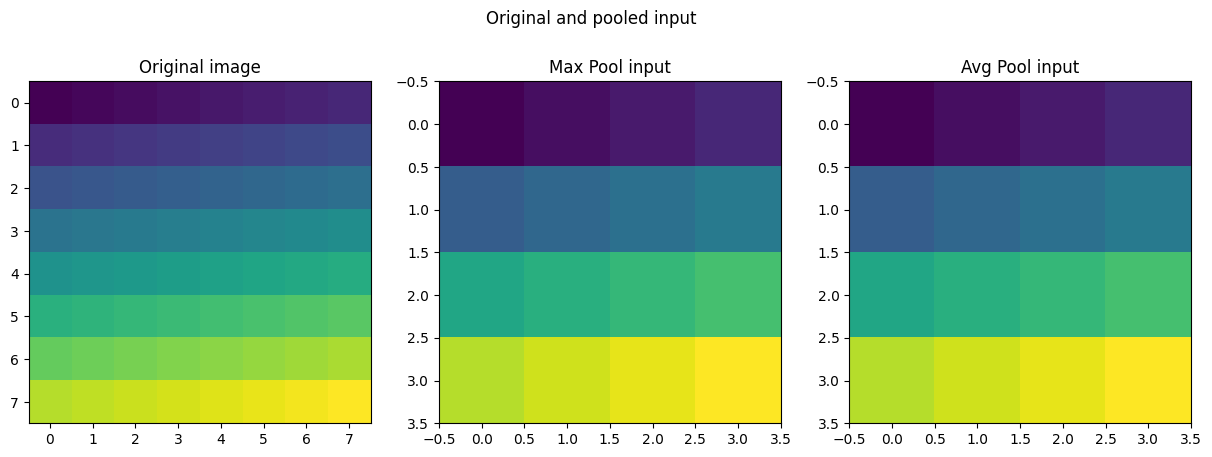

In [7]:
# pooling examples

import keras
from keras.models import Sequential
from keras.layers import MaxPooling2D, AveragePooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D
import matplotlib.pyplot as plt
import numpy as np

# Generate some data
img_size = 8
input_flattened = np.arange(0, img_size * img_size / 2, 0.5)
input_image = np.reshape(input_flattened, (img_size, img_size, 1))
input_image_shape = np.shape(input_image)
print(input_image_shape)
input_image_shape = (input_image_shape[0], input_image_shape[1], 1)

# Create models with different poolings
model1 = Sequential()
model1.add(AveragePooling2D(pool_size=(2, 2)))

model2 = Sequential()
model2.add(AveragePooling2D(pool_size=(2,2)))


# Perform pooling
output1 = model1.predict(np.array([input_image]))[0]
output2 = model2.predict(np.array([input_image]))[0]

# Visualize input and output
fig, axes = plt.subplots(1, 3, figsize = (15,5))
axes[0].imshow(input_image[:, :, 0]) 
axes[0].set_title('Original image')
axes[1].imshow(output1[:, :, 0])
axes[1].set_title('Max Pool input')
axes[2].imshow(output2[:, :, 0])
axes[2].set_title('Avg Pool input')
fig.suptitle(f'Original and pooled input')
plt.show()


## Output layer



## Classification problems: <img style="vertical-align:middle" src="images/classifications.png" alt="pooling" width="400"/>

- binary classification
    - formal: each sample can belong to one of $C = 2$ classes
    - examples:
        - spam vs. non-spaem emails
        - positive vs. negative sentiments in tweets
        - infected or non-infected cells with a virus
- multi-class classification
    - formal: each sample can belong to one of $C > 2$ classes
    - examples:
        - recognition of handwritten digits ($C = 10$ classes)
        - types of animals in images with a single animal/image (cats, dogs, monkeys, hedgehogs, etc.)
        - types of weather (sunny, cloudy, windy, rainy, etc.) 
- multi-label classification
    - formal: each sample can belong to one or more classes
    - examples:
        - images with animals (each image can have at least a cat, a dog, a monkey, a hedgehog, etc.)
        - types of weather (sunny \& cloudy)
        
<img style="vertical-align:middle" src="images/multiclass_multilabel.png" alt="pooling" width="600"/>



<details>
  <summary>Remember the theory behind binary classification </summary>
 

### Formalizare problema de clasificare binara:

* datele se caracterizeaza prin $atribute$ ($x = (x_1, x_2, ..., x_3)$) si $eticheta$ ($label \in \{0, 1\}$)
* modelul (liniar) de discriminare intre cele 2 clase: $y = f(x, w) = w_0 + w_1 * x_1 + w_2 * x_2 + ...$ (atentie, $y$ va fi un numar real, nu o eticheta)
* clasificatorul, adica modelul de predictie (asociaza o eticheta valorii reale calculata cu modelul de discriminare): $label = h(x, w) = transformare(f(x, w))$


### Metodologia rezolvarii unei probleme de clasificare binara

**Antrenare** 


> Input: 

un set de exemple etichetate $(x^i, y^i)$, cu $i \in \{1, 2, ..., n\}$, $x^i$ - vectorul de atribute asociate unui exemplu, $y^i$ etichetata asociata exemplului $x^i$ (poate fi 0 sau 1 - clasificare binara), $n$ reprezinta numarul de date de antrenament.


> Output: 

un model de discriminare intre cele 2 clase, adica valorile optime ale coeficientilor $w$ din ecuatia de regresie 
$$f(x, w) = w_0 + w_1 * x_1 + w_2 * x_2 + ... $$


> Algoritm: 

Regresie logistica - identificarea coeficientilor prin $Gradient Descent$
in care valoarea prezisa de discriminator este transformata in $[0, 1]$ 
$$y_{computed} = sigmoid(f(x,w))$$

**Testare** 

> Input: 

un exemplu ne-etichetat $(x_{new})$, cu $x_{new}$ - vectorul de atribute asociate acelui exemplu

> Output: 

eticheta prezisa pentru exemplul $x_{new}$

> Algoritm: 

Folosirea discriminantului invatat (a coeficientilor), a transformatei de tip sigmoid si a unui prag ($\Theta$): 
$$label = \left\{\begin{array}{lr}    0, & sigmoid(f(x_{new}, w)) < \Theta\\    1, & altfel \end{array} \right.$$

### Evaluarea performantei clasificatorului (a se vedea materialele din laboratorul 6)

* acuratetea 
* precizia
* rapelul 

</details>

<details>
  <summary>Remember the theory behind multi-class classification and one-vs-all solving methodology </summary>
 

### Formalizare problema de clasificare multiclasa - abordarea *one versus all*:

 <img style="vertical-align:middle" src="images/multiclass.png" width="400">

**One vs. all** provides a way to leverage binary classification. Given a classification problem with $noClasses$ possible solutions, a *one-vs.-all* solution consists of $noClasses$ separate binary classifiers—one binary classifier for each possible outcome. During training, the model runs through a sequence of binary classifiers, training each to answer a separate classification question. For example, given five possible classes (apple, bear, candy, dog, egg) and a picture of a dog, five different recognizers might be trained, four seeing the image as a negative example (not a dog) and one seeing the image as a positive example (a dog). That is:
* Is this image an apple? No.
* Is this image a bear? No.
* Is this image candy? No.
* Is this image a dog? Yes.
* Is this image an egg? No.

This approach is fairly reasonable when the total number of classes is small, but becomes increasingly inefficient as the number of classes rises.

* datele se caracterizeaza prin $atribute$ ($x = (x_1, x_2, ..., x_m)$) si $eticheta$ ($label \in \{1, 2, 3, ..., noClasses\}$)
* se transforma problema in $noClasses$ probleme de clasificare binara
    - de ex., prima problema va fi formata din exemplele din clasa cu eticheta 1 si toate celelalte exemplele (1 versus restul)
    - a doua problema va fi formata din exemplele din clasa cu eticheta 2 si toate celelalte exemplele (2 versus restul)
* se antreneaza $noClasses$ modele de discriminare binara 
* la testare, se aplica toate modelele binare si este ales cel care produce cea mai mare valoare (indicele modelului va indica eticheta prezisa)



### Metodologia one vs. all pentru rezolvarea unei probleme de clasificare multi-clasa

**Antrenare** 

> Input: 

un set de exemple etichetate $(x^i, y^i)$, cu $i \in \{1, 2, ..., n\}$, $x^i$ - vectorul de atribute asociate unui exemplu, $y^i$ etichetata asociata exemplului $x^i$ (poate fi  1, 2, ..., $noClasses$ - clasificare multi-clasa)

> Output: 

$noClasses$ modele de discriminare intre 2 cate 2 clase (adica valorile optime ale coeficientilor $w$ din ecuatiile de regresie $f^k(x, w) = w_0 + w_1 * x_1 + w_2 * x_2 + ...$, unde $k = 1, 2, ..., noClasses$

> Algoritm: 

Identificarea coeficientilor (din fiecare problema binara) prin:
* metoda celor mai mici patrate ($Least Square$)
* $Gradient Descent$
in care valoarea prezisa de discriminator este transformata in $[0, 1]$ ($y_{computed} = sigmoid(f(x,w))$).

**Testare** 

> Input: 

un exemplu ne-etichetat $(x_{new})$, cu $x_{new}$ - vectorul de atribute asociate acelui exemplu

> Output: 

eticheta prezisa pentru exemplul $x_{new}$

> Algoritm:
* calcularea valorilor prezise de fiecare discriminant si sigmoidarea lor (similar clasificarii binare) 
$$computed = [sigmoid(f^1(x_{new},w^1)), sigmoid(f^(x_{new}, w^2)), ..., sigmoid(f^{noClasses}(x_{new}, w^{noClasses}))]$$
* identificarea celei mai mari valori din $computed$ 
* pozitia valorii maximale indica eticheta corecta asociata lui $x_{new}$
$$label = argmax(computed)$$


### Evaluarea performantei clasificatorului

* acuratetea 
* precizia
* rapelul 

</details>

### Binary / multi-class classification



- Multiclass SVM - Largest score indicates the correct answer

    - Hinge loss: <img style="vertical-align:middle" src="images/hingeLoss.png" alt="svmLoss" width="200"/>

    -   * $L_i = \sum_{j \neq y_i}{
    \begin{cases} 
        0, s_{y_i} \geq s_j, \\ 
        s_j - s_{y_i} + 1, otherwise\\ 
    \end{cases}}$ 
    
    -  * $L_i = \sum_{j \neq y_i}{max(0, s_j - s_{y_i} + 1)}$ 

    - Example: <img style="vertical-align:middle" src="images/svmLoss.gif" alt="svmLoss" width="400"/>

    -  * Loss = (2.9 + 0 + 12.9) / 3 = 5.27

<!-- - \+ suitable for maximizing class separation (larger margins between classes)
- \+ robust to outliers (usefull for noisy data) 
- \+ convex function (existance of global optimum)
- \+ sparsity (less complex for computation)
- \- non-probabilistic  -->

- Softmax (normalized exponential function)

    - Largest probability indicates the correct answer

    - converts raw scores to probabilities <img  style="vertical-align:middle" src="images/softmaxLoss.png" alt="softmaxLoss" width="600"/>

    - "squashes" a #classes-dimensional vector z of arbitrary real values to a #classes-dimensional vector σ(z) of real values in the range (0, 1) that add up to 1
σ(z)j = exp(zj)/∑k=1..#classes exp(zk)


- An ANN or a CNN for solving a binary classification problem can have:

    - one output neuron with a sigmoid activation function (the computed value is transformed in [0, 1]): $f : R \rightarrow [0, 1]$, $f(s_i) = \frac{1}{1 + e^{-s^i}}$, where $s^i$ is the score computed by the network for the $i^{th}$ example data. The output value is transformed in a label by using a threshold $\Theta$: $label = \left\{\begin{array}{lr}    0, & f(s_i) < \Theta\\    1, & otherwise \end{array} \right.$

    - two output neurons with a softmax activation function (the computed values are transformed in [0, 1] and the sum of the values is 1): $f : R^2 \rightarrow [0, 1]^2$, $f(\bold{s}^i_j) = \frac{e^{s^i_j}}{\sum_{k=1}^{C}{e^{s^i_k}}}$, where $\bold{s}^i$ is the score computed by the network for the $i^{th}$ example data ($\bold{s}^i$ is a vector with 2 elements). The output value is transformed in a label by using the maximum value: $label = argmax_{j=1}^{C}(f(s^i_j))$

- An ANN or a CNN for solving a multi-class classification problem (with $C$ classes) must have:

    - $C$ output neurons with a softmax activation function (the computed values are transformed in [0, 1] and the sum of the values is 1): $f : R^C \rightarrow [0, 1]^C$, $f(\bold{s}^i_j) = \frac{e^{s^i_j}}{\sum_{k=1}^{C}{e^{s^i_k}}}$, where $\bold{s}^i$ is the score computed by the network for the $i^{th}$ example data ($\bold{s}^i$ is a vector with $C$ elements). The output value is transformed in a label by using the maximum value: $label = argmax_{j=1}^{C}(f(s^i_j))$

- Suppose that we have a single example in the training dataset. In this case, the $i$ index can be eliminated and the formulas can be simplified: 
$f : R^C \rightarrow [0, 1]^C$, $f(\bold{s}_j) = \frac{e^{s_j}}{\sum_{k=1}^{C}{e^{s_k}}}$, where $\bold{s}$ is the score computed by the network for An example data ($\bold{s}$ is a vector with $C$ elements). The output value is transformed in a label by using the maximum value: $label = argmax_{j=1}^{C}(f(s_j))$. 
We can use notation: $\bold{pred}_j= f(\bold{s}_j) = \frac{e^{s_j}}{\sum_{k=1}^{C}{e^{s_k}}}$

- Cross-entropy loss $CE = - \sum_{j=1}^{C}{y_j \log(pred_j)}$, where $y_j$ is the true label for the $j^{th}$ class (it is 1 if the class is the true label and 0 otherwise) and $pred_j$ is the computed value for the $j^{th}$ class.

- binary classification (e.g. $C = 2$): 
    - label for a positive example: $y = [1, 0]$
    - label for a negative example: $y = [0, 1]$
    - $CE = - \sum_{j=1}^{C}{y_j \log(pred_j)} = - y_1 \log(pred_1) - y_2 \log(pred_2) = - y_1 \log(pred_1) - (1 - y_1) \log(1- pred_1)$
    - $CE(positive example) = - \log(pred_1)$ and 
    - $CE(negative example) = - \log(1 - pred_1)$

- multi-class classification (e.g. $C = 3$):
    - label for an example that belong to the first class $y = [1, 0, 0]$
    - label for an example that belong to the second class $y = [0, 1, 0]$
    - label for an example that belong to the third class $y = [0, 0, 1]$
    - $CE = - \sum_{j=1}^{C}{y_j \log(pred_j)}$ (only those terms that correspond to the true label are different from 0)



### Multi-label classification

- An ANN or a CNN for solving a multi-label classification problem (with $C$ classes) must have:

    - $C$ output neurons with a sigmoid activation function (the computed values are transformed in [0, 1]): $f : R^C \rightarrow [0, 1]^C$, $f(\bold{s}^i_j) = \frac{1}{1 + e^{-s^i_j}}$, where $\bold{s}^i$ is the score computed by the network for the $i^{th}$ example data ($\bold{s}^i$ is a vector with $C$ elements). 

- Suppose that we have a single example in the training dataset. In this case, the $i$ index can be eliminated and the formulas can be simplified: $f : R^C \rightarrow [0, 1]^C$, $f(\bold{s}_j) = \frac{1}{1 + e^{-s_j}}$, where $\bold{s}$ is the score computed by the network for an example data ($\bold{s}$ is a vector with $C$ elements). We can use notation: $\bold{pred}_j= f(\bold{s}_j) = \frac{1}{1 + e^{-s_j}}$

- multi-label classification (e.g. $C = 3$):
    - label for an example that belong only to the first class $y = [1, 0, 0] = [(1,0), (0,0), (0,0)]$
    - label for an example that belong to the first and the second class $y = [1, 1, 0]  = [(1,0), (1,0), (0,0)]$
    - label for an example that belong to the second and the third class $y = [0, 1, 1]  = [(0,0), (1,0), (1,0)]$
    - we can use $C$ times the CE for binary classification: $CE = - \sum_{j=1}^{C}{ CE_j}$, where $CE_j = - y_{j,1} \log(pred_j) - (1 - y_{j,1}) \log(1 - pred_j) = \begin{cases} - \log(pred_j),& \text{if } y_{j,1} = 1 \\ - \log(1 - pred_j), & \text{if } y_{j,1} = 0 \end{cases}$

Note:
- Images taken from Andrej Karpathy’s lectures about Conv NNs